---
title: "Фінальний проєкт І"
description:
  Документ зроблено в [Quarto](https://quarto.org/)
author: Качур Артем (АКІТ-21-2), 2023"
date: "11.21.2023"
lang: ukr
format:
  html:
    code-fold: true
jupyter: python3
---

__Мета:__

* _вдосконалення навичок у використанні Python для розв'язання складних завдань;_
* _інтеграція методів програмування в одну програму, що складається з багатьох різних елементів._

##### __Примітка__. Завдання з матеріалів [python institute.](https://pythoninstitute.org/pcep). Завдання є фінальним проєктом, завершує ч. 1 рівня "Essential", після чого можна пройти сертифікаційний тест. 

### Постановка завдання

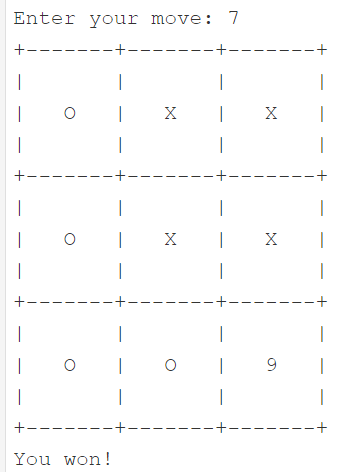Ваше завдання - написати просту програму, яка вдає, ніби грає з користувачем у хрестики-нуліки. Щоб вам було простіше, ми вирішили спростити гру. Ось наші припущення:

* комп'ютер (тобто Ваша програма) повинен грати у гру, використовуючи 'X';
* користувач (наприклад, Ви) повинен грати в гру, використовуючи символи 'O';
* перший хід належить комп'ютеру - він завжди поміщає свій перший 'X' у середину дошки;
* всі квадрати пронумеровані рядок за рядком, починаючи з 1 (див. приклад сеансу нижче для довідки)
* користувач робить свій хід, вводячи номер обраного ним квадрата - число має бути дійсним, тобто. воно має бути цілим числом, воно має бути більше 0 і менше 10 і воно не може вказувати на поле, яке вже зайняте;
* програма перевіряє, чи закінчена гра - є чотири можливі варіанти: гра повинна продовжуватися, гра закінчується нічиєю, Ви виграєте або комп'ютер виграє;
* комп'ютер відповідає  

ходом і перевірка повторюється;
* не застосовуйте штучний інтелект у будь-якій формі – випадковий вибір поля, зроблений комп'ютером, досить добрий для гри.  

Приклад сеансу роботи з програмою може виглядати так:
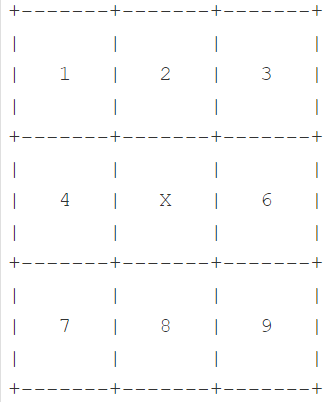  
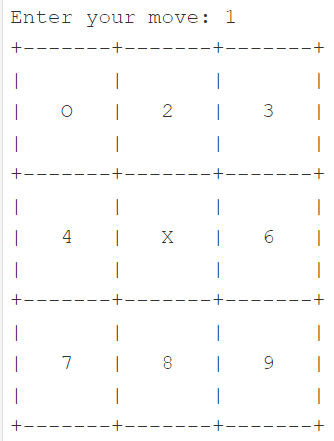  
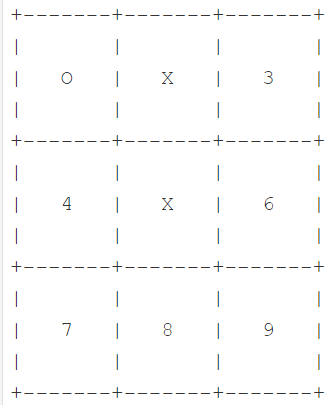  
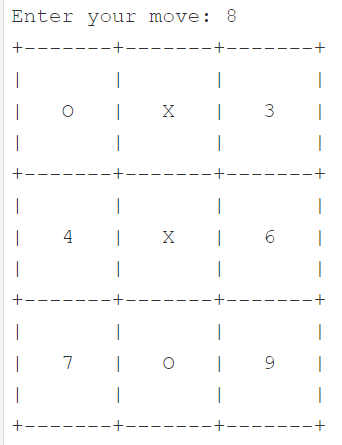  
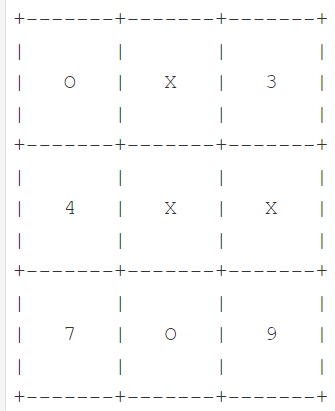  
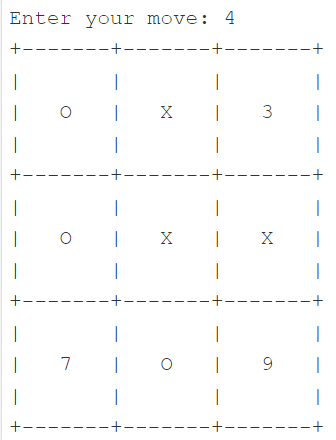  
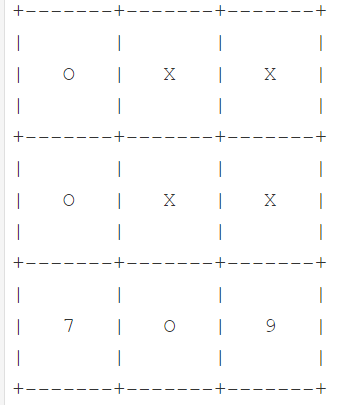  
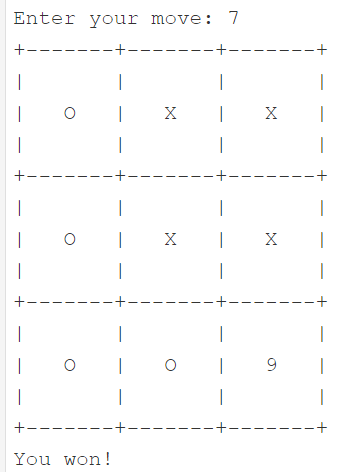  

### Вимоги

Реалізуйте такі функції:

* дошка повинна зберігатися як список з трьох елементів, у той час як кожен елемент є ще одним список з трьох елементів (внутрішні списки представляють рядки), так що всі квадрати можуть бути доступні з використанням наступного синтаксису:  

`board[row][column]`  

* кожен із елементів внутрішнього списку може містити `'O'`, `'X'` або цифру, що становить номер квадрата (такий квадрат вважається вільним)
* зовнішній вигляд дошки повинен бути таким самим, як у прикладі.  

Отримати випадкове ціле число можна за допомогою функції Python під назвою `randrange()`. У наведеному нижче прикладі програми показано, як використовувати її (програма виводить десять випадкових чисел від `0` до `8`).

Примітка: інструкція `from-import` забезпечує доступ до функції `randrange`, визначеної у зовнішньому модулі Python, що викликається `random`.

```
from random import randrange

for i in range(10):  
    print(randrange(8))
```

In [1]:
from random import randrange

def display_board(board):#Виведення ігрової дошки
    for row in range(7):
        if row % 2 == 0:
            print("+-------" * 3 + "+")
        else:
            for col in range(3):
                print("|", end="")
                print(f"   {board[row // 2][col]}   ", end="")
            print("|")
        if row % 2 == 0 and row != 6:
            print("|       " * 3 + "|")
            print("|       " * 3 + "|")


def enter_move(board): #Введення ходу гравця
    free_fields = make_list_of_free_fields(board)
    while True:
        try:
            move = int(input("Виберіть клітинку (від 1 до 9): "))
            if move in free_fields:
                break
            else:
                print("Вибрана клітинка вже зайнята!Спробуйте знову.")
        except ValueError:
            print("Помилка!Некоректне введення , введіть число.")

    mark_move(board, move, 'O')

def make_list_of_free_fields(board):#Створення списку вільних полів
    free_fields = []
    for row in range(3):
        for col in range(3):
            if board[row][col] not in ['O', 'X']:
                free_fields.append(board[row][col])
    return free_fields

def victory_for(board, sign):   # Перевірка перемоги;перевірка рядків та стовпців
    for i in range(3):
        if all(board[i][j] == sign for j in range(3)) or all(board[j][i] == sign for j in range(3)):
            return True

    # Check diagonals
    if all(board[i][i] == sign for i in range(3)) or all(board[i][2 - i] == sign for i in range(3)):
        return True

    return False

def draw_move(board): #Функція ходу комп'ютера
    free_fields = make_list_of_free_fields(board)
    move = randrange(1, 10)
    while move not in free_fields:
        move = randrange(1, 10)
    mark_move(board, move, 'X')

def mark_move(board, move, sign): #Функція позначення ходу на дошці
    for row in range(3):
        for col in range(3):
            if board[row][col] == move:
                board[row][col] = sign

def when_draw(board): #Варіант коли відбулася нічия
    for row in board: # Перевірка, чи дошка заповнена
        for cell in row:
            if cell not in ['O', 'X']:
                return False
    return True
def play_game(): #Функція самої гри
    board = [[1, 2, 3], [4, 'X', 6], [7, 8, 9]]
    display_board(board)

    for _ in range(4):
        enter_move(board)
        display_board(board)
        if victory_for(board, 'O'):
            print("Ви перемогли!")
            break
        elif when_draw(board):
            print("Нічия!Спробуйте зіграти знову.")
            return play_game()

        draw_move(board)
        display_board(board)

        if victory_for(board, 'X'):
            print("Комп'ютер переміг!")
            break
        elif when_draw(board):
            print("Нічия!Спробуйте зіграти знову.")
            return play_game()


play_game()


+-------+-------+-------+
|       |       |       |
|       |       |       |
|   1   |   2   |   3   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   4   |   X   |   6   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   7   |   8   |   9   |
+-------+-------+-------+


Виберіть клітинку (від 1 до 9):  6


+-------+-------+-------+
|       |       |       |
|       |       |       |
|   1   |   2   |   3   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   4   |   X   |   O   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   7   |   8   |   9   |
+-------+-------+-------+
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   1   |   2   |   3   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   4   |   X   |   O   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   7   |   X   |   9   |
+-------+-------+-------+


Виберіть клітинку (від 1 до 9):  2


+-------+-------+-------+
|       |       |       |
|       |       |       |
|   1   |   O   |   3   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   4   |   X   |   O   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   7   |   X   |   9   |
+-------+-------+-------+
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   1   |   O   |   3   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   4   |   X   |   O   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   7   |   X   |   X   |
+-------+-------+-------+


Виберіть клітинку (від 1 до 9):  7


+-------+-------+-------+
|       |       |       |
|       |       |       |
|   1   |   O   |   3   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   4   |   X   |   O   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   O   |   X   |   X   |
+-------+-------+-------+
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   1   |   O   |   X   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   4   |   X   |   O   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   O   |   X   |   X   |
+-------+-------+-------+


Виберіть клітинку (від 1 до 9):  1


+-------+-------+-------+
|       |       |       |
|       |       |       |
|   O   |   O   |   X   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   4   |   X   |   O   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   O   |   X   |   X   |
+-------+-------+-------+
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   O   |   O   |   X   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   X   |   X   |   O   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   O   |   X   |   X   |
+-------+-------+-------+
Нічия!Спробуйте зіграти знову.
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   1   |   2   |   3   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   4   |   X   |   6   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   7  

Виберіть клітинку (від 1 до 9):  1


+-------+-------+-------+
|       |       |       |
|       |       |       |
|   O   |   2   |   3   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   4   |   X   |   6   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   7   |   8   |   9   |
+-------+-------+-------+
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   O   |   2   |   3   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   4   |   X   |   X   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   7   |   8   |   9   |
+-------+-------+-------+


Виберіть клітинку (від 1 до 9):  4


+-------+-------+-------+
|       |       |       |
|       |       |       |
|   O   |   2   |   3   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   O   |   X   |   X   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   7   |   8   |   9   |
+-------+-------+-------+
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   O   |   X   |   3   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   O   |   X   |   X   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   7   |   8   |   9   |
+-------+-------+-------+


Виберіть клітинку (від 1 до 9):  7


+-------+-------+-------+
|       |       |       |
|       |       |       |
|   O   |   X   |   3   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   O   |   X   |   X   |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|   O   |   8   |   9   |
+-------+-------+-------+
Ви перемогли!


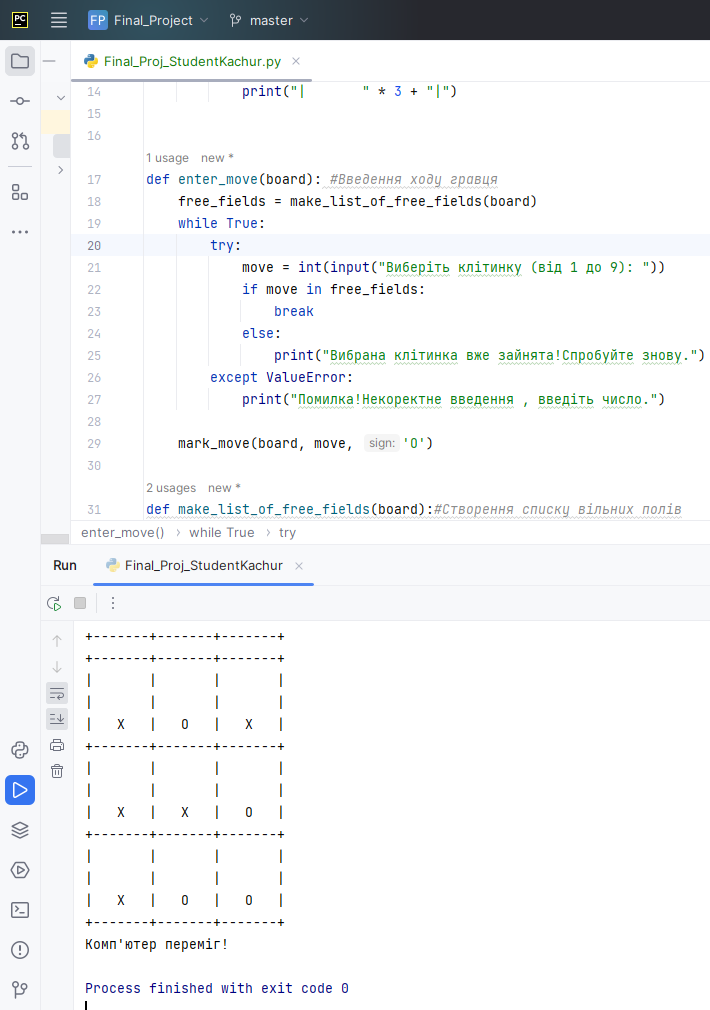
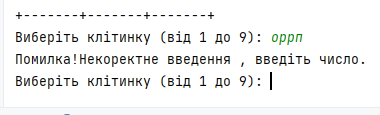
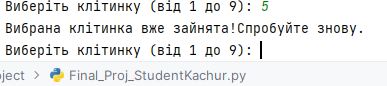

### Завдання для самостіної роботи

1. Виконати завдання.

1. Створити файл __project_1_StudentLastName.py__ з написаним кодом. 

1. Закомітити файл у локальний репозиторій.

1. Відправити ("запушити") поточну версію Git-проєкта у віддалений репозиторій на GitHub.

1. Звіт має складатися з файлу (за основу взяти __цей Python-зошит__)  `project_1_StudentLastName.ipynb`. (Можливі якісь додакові файли)

### References

1. [Anaconda (Python distribution)](https://uk.wikipedia.org/wiki/Anaconda_(Python_distribution))
2. [Conda](https://conda.io/en/latest/)
3. [Pro Git Book](https://git-scm.com/book/en/v2)
4. [OpenEDG Python Institute](https://pythoninstitute.org/)
5. [Cisco. Networking Academy](https://www.netacad.com/)
6. [Научно-издательская система Quarto](https://data-visualization-blog.netlify.app/posts/quarto/)